In [10]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [11]:
run = 5
number = 1

In [12]:
#folder = "../../../" + sut + "/appBenchmark/results/run" + str(run) + "/" + str(number) + "/"
#folder = "../../../../../results/run" + str(run) + "/" + str(number) + "/"
folder = "../../resultsVm/run" + str(run) + "/" + str(number) + "/"
print(folder)

../../resultsVm/run5/1/


In [13]:
all_files = glob.glob(folder + "*")
print("Files in folder:")
for filename in all_files:
    print(filename)

Files in folder:
../../resultsVm/run5/1\getResults.log
../../resultsVm/run5/1\info.log
../../resultsVm/run5/1\latenciesInsertsNew.csv
../../resultsVm/run5/1\latenciesInsertsOld.csv
../../resultsVm/run5/1\latenciesQueries1New.csv
../../resultsVm/run5/1\latenciesQueries1Old.csv
../../resultsVm/run5/1\latenciesQueries2New.csv
../../resultsVm/run5/1\latenciesQueries2Old.csv
../../resultsVm/run5/1\logInsertsNew.log
../../resultsVm/run5/1\logInsertsOld.log
../../resultsVm/run5/1\logQueries1New.log
../../resultsVm/run5/1\logQueries1Old.log
../../resultsVm/run5/1\logQueries2New.log
../../resultsVm/run5/1\logQueries2Old.log
../../resultsVm/run5/1\new_version_container.log
../../resultsVm/run5/1\old_version_container.log
../../resultsVm/run5/1\runBenchmark.log
../../resultsVm/run5/1\start_tsbs-r5n1.log
../../resultsVm/run5/1\start_vm-r5n1.log
../../resultsVm/run5/1\teardown.log


In [14]:
insertsOld = pd.read_csv(folder + "latenciesInsertsOld.csv",
                         header=None,
                         names=["batch","latency (ms)"],
                         sep=" ")
number = len(insertsOld.index)
removeFirst = int(0.05 * number)
removeLast = int(0.25 * number)
insertsOld = insertsOld.iloc[removeFirst:removeLast , :]

insertsNew = pd.read_csv(folder + "latenciesInsertsNew.csv",
                         header=None,
                         names=["batch","latency (ms)"],
                         sep=" ")
number = len(insertsNew.index)
removeFirst = int(0.05 * number)
removeLast = int(0.25 * number)
insertsNew = insertsNew.iloc[removeFirst:removeLast , :]

queries1Old = pd.read_csv(folder + "latenciesQueries1Old.csv",
                         header=None,
                         names=["query","latency (ms)"],
                         sep=" ")
number = len(queries1Old.index)
removeFirst = int(0.05 * number)
removeLast = int(0.25 * number)
queries1Old = queries1Old.iloc[removeFirst:removeLast , :]

queries1New = pd.read_csv(folder + "latenciesQueries1New.csv",
                         header=None,
                         names=["query","latency (ms)"],
                         sep=" ")
number = len(queries1New.index)
removeFirst = int(0.05 * number)
removeLast = int(0.25 * number)
queries1New = queries1New.iloc[removeFirst:removeLast , :]

queries2Old = pd.read_csv(folder + "latenciesQueries2Old.csv",
                         header=None,
                         names=["query","latency (ms)"],
                         sep=" ")
number = len(queries2Old.index)
removeFirst = int(0.05 * number)
removeLast = int(0.25 * number)
queries2Old = queries2Old.iloc[removeFirst:removeLast , :]

queries2New = pd.read_csv(folder + "latenciesQueries2New.csv",
                         header=None,
                         names=["query","latency (ms)"],
                         sep=" ")
number = len(queries2New.index)
removeFirst = int(0.05 * number)
removeLast = int(0.25 * number)
queries2New = queries2New.iloc[removeFirst:removeLast , :]

#queries1Old.drop(queries1Old[queries1Old["query"] > 1100].index, inplace=True)
#queries1New.drop(queries1New[queries1New["query"] > 1100].index, inplace=True)
#queries2Old.drop(queries2Old[queries2Old["query"] > 1100].index, inplace=True)
#queries2New.drop(queries2New[queries2New["query"] > 1100].index, inplace=True)

print("Done.")

Done.


In [15]:
insertsOld.describe()

,batch,latency (ms)
count,51840.000000,51840.000000
mean,38880.500000,3.508366
std,14965.063314,5.140828
min,12961.000000,1.014701
25%,25920.750000,1.601310
50%,38880.500000,1.957985
75%,51840.250000,2.969491
max,64800.000000,82.354568


In [16]:
insertsNew.describe()


,batch,latency (ms)
count,51840.000000,51840.000000
mean,38880.500000,3.164512
std,14965.063314,4.856718
min,12961.000000,0.967361
25%,25920.750000,1.545373
50%,38880.500000,1.834925
75%,51840.250000,2.626942
max,64800.000000,84.578144


In [17]:
rows = []
for lat in insertsOld["latency (ms)"]:
    rows.append({
        "type" : "inserts",
        "version" : "base",
        "latency (ms)" : lat
    })
for lat in insertsNew["latency (ms)"]:
    rows.append({
        "type" : "inserts",
        "version" : "variation",
        "latency (ms)" : lat
    })

df_result_inserts = pd.DataFrame(rows)
df_result_inserts.describe()

rows = []
for lat in queries1Old["latency (ms)"]:
    rows.append({
        "type" : "simple queries",
        "version" : "base",
        "latency (ms)" : lat
    })
for lat in queries1New["latency (ms)"]:
    rows.append({
        "type" : "simple queries",
        "version" : "variation",
        "latency (ms)" : lat
    })

df_result_queries1 = pd.DataFrame(rows)
df_result_queries1.describe()

rows = []
for lat in queries2Old["latency (ms)"]:
    rows.append({
        "type" : "group-by queries",
        "version" : "base",
        "latency (ms)" : lat
    })
for lat in queries2New["latency (ms)"]:
    rows.append({
        "type" : "group-by queries",
        "version" : "variation",
        "latency (ms)" : lat
    })

df_result_queries2 = pd.DataFrame(rows)
df_result_queries2.describe()

,latency (ms)
count,576.000000
mean,3574.718119
std,493.314261
min,1827.324705
25%,3213.495625
50%,3545.049156
75%,3938.054047
max,4996.126551


<Figure size 640x480 with 0 Axes>

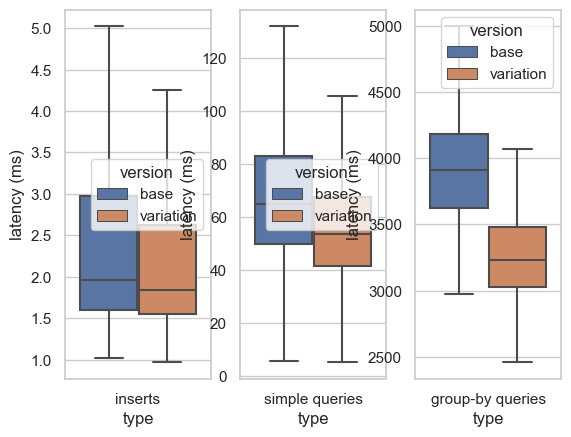

In [18]:
sns.set(style="whitegrid")
f, axes = plt.subplots(1, 3)
sns.boxplot(y="latency (ms)", x= "type", data=df_result_inserts,  orient='v' , ax=axes[0], showfliers=False, hue="version")
sns.boxplot(y="latency (ms)", x= "type", data=df_result_queries1,  orient='v' , ax=axes[1], showfliers=False, hue="version")
sns.boxplot(y="latency (ms)", x= "type", data=df_result_queries2,  orient='v' , ax=axes[2], showfliers=False, hue="version")

plt.show()
f.savefig(f'figure1.png')
plt.clf()